# SENTIMENTAL AI
# SnT Summer Project, BCS-IITK
## Assignment-2

Reference- https://github.com/07Agarg/Natural-Language-Processing-In-Tensorflow-Course/blob/master/Week%204/NLP_Week4_Exercise_Shakespeare_Question.ipynb 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()



corpus = data.lower().split("\n")  #convert to lower case and then split the data on '\n' to create a corpus of lines
tokenizer.fit_on_texts(corpus) #fit the tokenizer on the corpus
total_words = len(tokenizer.word_index) + 1



# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2022-06-17 16:20:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2022-06-17 16:20:29 (81.3 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))  #(# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences=True)))  #(# A Bidirectional LSTM Layer)
model.add(Dropout(0.2))  #(# A dropout layer)
model.add(LSTM(100))  #(# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu'))  #(# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))  #(# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')  #(# Pick a loss function and an optimizer)
print(model.summary()) #print model summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           321100    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1605)              162105    
                                                                 
 dense_1 (Dense)             (None, 3211)              5156866   
                                                        

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1) #change the number of epochs after observing the plots later on at the point where the accuracy saturates

Epoch 1/100
484/484 [==============================] - 58s 101ms/step - loss: 6.7975 - accuracy: 0.0233
Epoch 2/100
484/484 [==============================] - 49s 101ms/step - loss: 6.4077 - accuracy: 0.0343
Epoch 3/100
484/484 [==============================] - 48s 100ms/step - loss: 6.2135 - accuracy: 0.0347
Epoch 4/100
484/484 [==============================] - 49s 102ms/step - loss: 5.9898 - accuracy: 0.0430
Epoch 5/100
484/484 [==============================] - 48s 99ms/step - loss: 5.7144 - accuracy: 0.0532
Epoch 6/100
484/484 [==============================] - 48s 99ms/step - loss: 5.4387 - accuracy: 0.0632
Epoch 7/100
484/484 [==============================] - 48s 99ms/step - loss: 5.1668 - accuracy: 0.0755
Epoch 8/100
484/484 [==============================] - 48s 99ms/step - loss: 4.9021 - accuracy: 0.0952
Epoch 9/100
484/484 [==============================] - 49s 101ms/step - loss: 4.6068 - accuracy: 0.1120
Epoch 10/100
484/484 [==============================] - 48s 99ms/ste

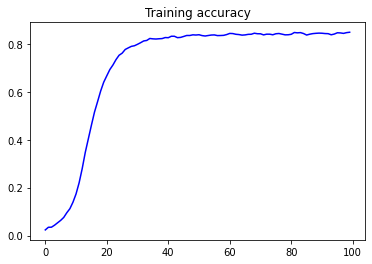

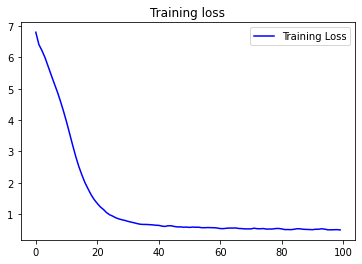

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100 #Play with this quantity to change the number of words you want to see in the output after the seed_text

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
  predict_x = model.predict(token_list)
  classes_x = np.argmax(predict_x, axis=1)
  output_word = ""
  for word, index in tokenizer.word_index.items():
    if index == classes_x:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope we know loss of love of thee of thy sight fled gone worth long joy live true old dear love of my possessing might rise and fall hid of part rolling twain twain twain twain rolling rolling twain twain twain twain twain ill delight can sing new worth in this ' dumb esteem'd esteem'd bright another ' live bright no art old 'will ' nearly 'will ' delight can survey worth that still new bright bright thy fair eyes dead room hence room staineth staineth staineth by sorrow judgment rotten rolling rolling rolling rolling rotten rotten far room favour suppress'd
